In [1]:
import csv
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2

#Parameters
MIN_AREA_FOR_STOP = 3
MIN_COMPACTNESS_FOR_BULB = 0.04
LOWER_RED = np.array([90-30,30,40])
UPPER_RED = np.array([90+30,255,255])

image_dir = '../labeled-data/segmented-images'
filenames = []
labels = []
states = []

with open('../labeled-data/labels.csv', newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in csvreader:
        filenames.append(row[0])
        labels.append(row[1])
        
filepaths = [os.path.join(image_dir,filename)for filename in filenames]


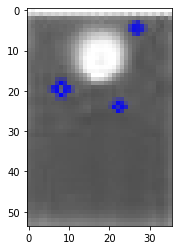

Press Enter to continue...


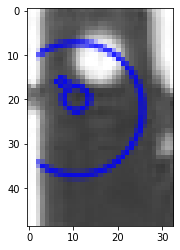

Press Enter to continue...


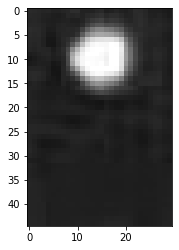

Press Enter to continue...


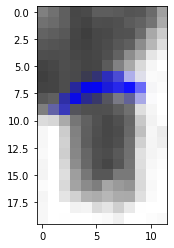

Press Enter to continue...


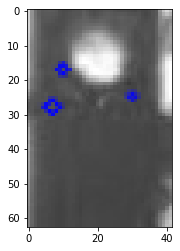

Press Enter to continue...


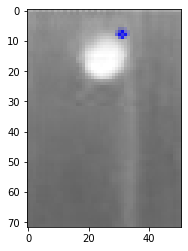

Press Enter to continue...


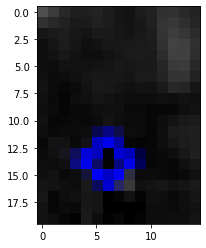

Press Enter to continue...


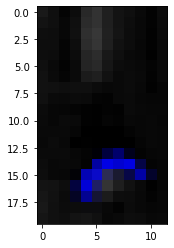

Press Enter to continue...


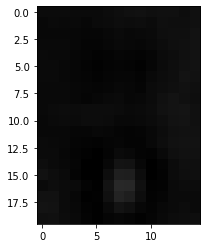

Press Enter to continue...


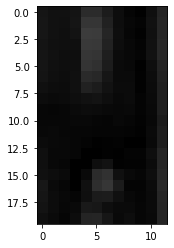

Press Enter to continue...


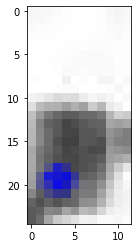

Press Enter to continue...


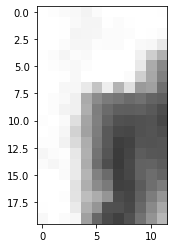

Press Enter to continue...


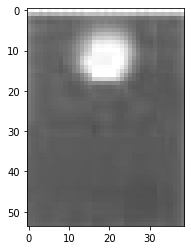

Press Enter to continue...


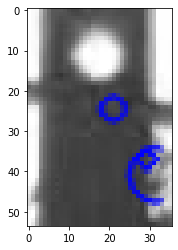

Press Enter to continue...


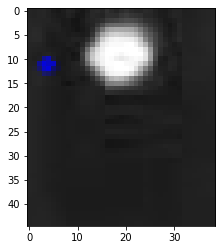

Press Enter to continue...


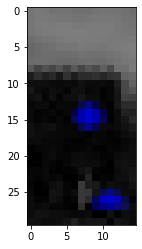

Press Enter to continue...


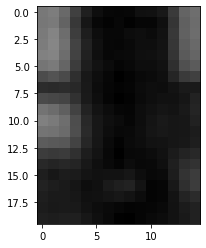

Press Enter to continue...


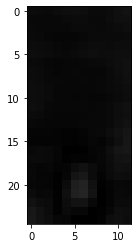

Press Enter to continue...


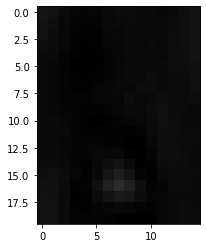

In [ ]:
def extract_blob_colour(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_gray = img[:,:,0]
    # Setup SimpleBlobDetector parameters.
    params = cv2.SimpleBlobDetector_Params()
    # Change thresholds
    params.minThreshold = 1;
    params.maxThreshold = 200;
    # Filter by Area.
    params.filterByArea = False
    params.minArea = 6
    params.maxArea = 200
    # Filter by Circularity
    params.filterByCircularity = False
    params.minCircularity = 0.7
    # Filter by Convexity
    params.filterByConvexity = False
    params.minConvexity = 0.87
    # Filter by Inertia
    params.filterByInertia = False
    params.minInertiaRatio = 0.01

    detector = cv2.SimpleBlobDetector_create(params)
    keypoints = detector.detect(img_gray)
    img_with_keypoints = cv2.drawKeypoints(img_gray, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.imshow(img_with_keypoints)
    plt.show()
    input("Press Enter to continue...")
    return 

for filepath in filepaths:
    img = cv2.imread(filepath)
    extract_blob_colour(img)
    #if area > MIN_AREA_FOR_STOP and area/(perimeter*perimeter)> MIN_COMPACTNESS_FOR_BULB:
    #    state = 'stop'
        #print(area/(perimeter*perimeter))
    #else:
    #    state = 'go'
    #states.append(state)
        
misclassified_idxs = []
for i in range(len(labels)):
    if states[i] != labels[i]:
        misclassified_idxs.append(i)
   
total_stop = 0
total_stop_missed = 0
for i in range(len(labels)):
    if labels[i]=='stop':
        total_stop = total_stop + 1
        if states[i]!='stop':
            total_stop_missed = total_stop_missed + 1
        
print("Percent misclassified: " + str(100*len(misclassified_idxs)/len(labels)))
print("Percent stop missed: " + str(100*total_stop_missed/total_stop))
        

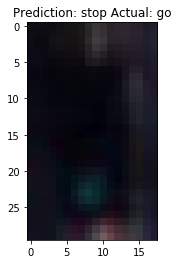

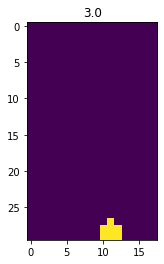

Area: 3.0
Perimeter: 6.828427076339722
Area/Perimeter^2: 0.06433982913238406


In [ ]:
for idx in misclassified_idxs:
    filepath = filepaths[idx]
    img = cv2.imread(filepath)
    mask, area, perimeter = extract_red_area(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title("Prediction: " +states[idx] + " Actual: " + labels[idx])
    plt.show()
    plt.imshow(mask)
    plt.title(area)
    plt.show()
    print("Area: "+str(area) )
    print("Perimeter: "+str(perimeter) )
    if(perimeter>0):
        print("Area/Perimeter^2: "+str(area/(perimeter*perimeter)) )
    #cv2.imshow(states[idx], img)
    input("Press Enter to continue...")
    